In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, and_, inspect, func

# Reflect Tables into SQLAlchemy ORM

In [2]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [3]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [4]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [5]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [6]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [7]:
first_row_m = session.query(Measurement).first()
first_row_m.__dict__

# Exploratory Climate Analysis

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x174a719ea58>,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1}

In [8]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
columns

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'date',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'prcp',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'tobs',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [9]:
first_row_s = session.query(Station).first()
first_row_s.__dict__



{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x174a7190eb8>,
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1}

In [10]:
# Exploratory Climate Analysis
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
 
# Latest Date
last_day = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_day = dt.datetime.strptime(last_day[0], '%Y-%m-%d')
print("Last Date: ", last_day)

query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date: ", query_date)





Last Date:  2017-08-23 00:00:00
Query Date:  2016-08-23


In [11]:
measurements = session.query(Measurement)
# for measurement in measurements:
#   print(measurement.prcp, measurement.date)
# engine.execute('SELECT * FROM Measurement').fetchall()

In [12]:

# Perform a query to retrieve the data and precipitation scores

year_query = measurements.filter(and_(Measurement.date >= '2016-08-23', Measurement.date <= '2017-08-23')) 
for day in year_query:
    print(day.prcp, day.date)


0.0 2016-08-23
0.08 2016-08-24
0.08 2016-08-25
0.0 2016-08-26
0.0 2016-08-27
0.01 2016-08-28
0.0 2016-08-29
0.0 2016-08-30
0.13 2016-08-31
0.0 2016-09-01
0.0 2016-09-02
0.0 2016-09-03
0.03 2016-09-04
None 2016-09-05
None 2016-09-06
0.05 2016-09-07
0.0 2016-09-08
0.03 2016-09-09
0.0 2016-09-10
0.05 2016-09-11
0.0 2016-09-12
0.02 2016-09-13
1.32 2016-09-14
0.42 2016-09-15
0.06 2016-09-16
0.05 2016-09-17
0.0 2016-09-18
0.0 2016-09-19
0.0 2016-09-20
0.0 2016-09-21
0.02 2016-09-22
0.0 2016-09-23
0.0 2016-09-24
0.0 2016-09-25
0.06 2016-09-26
0.02 2016-09-27
0.0 2016-09-28
0.0 2016-09-29
0.0 2016-09-30
0.0 2016-10-01
0.0 2016-10-02
0.0 2016-10-03
0.0 2016-10-04
0.0 2016-10-05
0.0 2016-10-06
0.0 2016-10-07
0.0 2016-10-08
0.0 2016-10-09
0.0 2016-10-10
0.0 2016-10-11
0.0 2016-10-12
0.0 2016-10-13
0.0 2016-10-14
0.0 2016-10-15
0.0 2016-10-16
0.01 2016-10-17
0.0 2016-10-18
0.0 2016-10-19
0.0 2016-10-20
0.05 2016-10-21
0.15 2016-10-22
0.01 2016-10-23
0.0 2016-10-24
0.03 2016-10-25
0.0 2016-10-26
0.

0.02 2017-06-17
0.18 2017-06-18
0.19 2017-06-19
0.17 2017-06-20
None 2017-06-23
None 2017-06-26
None 2017-06-29
0.0 2017-06-30
None 2017-07-03
None 2017-07-05
None 2017-07-07
0.06 2017-07-08
0.0 2017-07-09
0.0 2017-07-10
0.0 2017-07-11
0.02 2017-07-12
0.3 2017-07-13
0.0 2017-07-14
0.01 2017-07-15
0.12 2017-07-16
0.16 2017-07-17
0.0 2017-07-18
0.09 2017-07-19
0.0 2017-07-20
0.0 2017-07-21
0.12 2017-07-22
0.07 2017-07-23
1.19 2017-07-24
0.12 2017-07-25
0.02 2017-07-26
0.0 2017-07-27
0.14 2017-07-28
0.02 2017-07-29
None 2017-07-31
0.12 2017-08-01
0.05 2017-08-02
0.01 2017-08-03
0.04 2017-08-04
0.0 2017-08-06
0.0 2017-08-07
0.1 2017-08-08
0.0 2017-08-09
0.0 2017-08-10
0.0 2017-08-11
None 2017-08-13
0.01 2017-08-14
0.0 2017-08-15
0.0 2017-08-16
0.0 2017-08-17
0.0 2017-08-18
0.0 2017-08-19
0.01 2017-08-20
0.02 2017-08-21
0.0 2017-08-23
None 2016-08-23
None 2016-08-24
0.0 2016-08-25
0.04 2016-08-26
None 2016-08-29
0.02 2016-08-30
None 2016-08-31
None 2016-09-01
None 2016-09-02
None 2016-09-08

0.01 2017-02-15
0.73 2017-02-16
0.13 2017-02-17
0.0 2017-02-18
0.09 2017-02-19
0.0 2017-02-20
0.0 2017-02-21
0.06 2017-02-22
0.0 2017-02-23
0.0 2017-02-24
0.0 2017-02-25
0.0 2017-02-26
0.0 2017-02-27
0.04 2017-02-28
2.12 2017-03-01
1.88 2017-03-02
0.27 2017-03-03
0.0 2017-03-04
0.41 2017-03-05
0.03 2017-03-06
0.0 2017-03-07
0.0 2017-03-08
0.65 2017-03-09
0.03 2017-03-10
0.01 2017-03-11
0.0 2017-03-12
0.0 2017-03-13
0.0 2017-03-14
0.06 2017-03-15
0.0 2017-03-16
0.12 2017-03-17
0.0 2017-03-18
0.0 2017-03-19
0.02 2017-03-20
0.09 2017-03-21
0.0 2017-03-22
0.0 2017-03-23
0.12 2017-03-24
0.93 2017-03-25
0.0 2017-03-26
0.01 2017-03-27
0.0 2017-03-28
0.01 2017-03-29
0.04 2017-03-30
0.01 2017-03-31
0.21 2017-04-01
0.0 2017-04-02
0.26 2017-04-03
0.09 2017-04-04
0.1 2017-04-05
0.06 2017-04-06
0.0 2017-04-07
0.0 2017-04-08
0.0 2017-04-09
0.01 2017-04-10
0.03 2017-04-11
0.11 2017-04-12
0.59 2017-04-13
2.3 2017-04-14
0.38 2017-04-15
0.47 2017-04-16
1.04 2017-04-17
2.03 2017-04-18
0.02 2017-04-19
0.0

In [13]:
year_query = session.query(Measurement.date, Measurement.prcp).filter(and_(Measurement.date >= '2016-08-23', Measurement.date <= '2017-08-23')).all()
df = pd.DataFrame(year_query, columns=['date', 'precipitation'])
df.set_index(df['date'], drop=True, inplace=True)
#df=df.drop(columns="date")
df.tail()
# df.dtypes


,date,precipitation
date,,
2017-08-19,2017-08-19,0.09
2017-08-20,2017-08-20,NaN
2017-08-21,2017-08-21,0.56
2017-08-22,2017-08-22,0.50
2017-08-23,2017-08-23,0.45


In [14]:
# Sort the dataframe by date
df.sort_values(by="date", inplace=True, ascending=True)

df.head()

C:\Users\h4wth\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'date' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  


,date,precipitation
date,,
2016-08-23,2016-08-23,0.00
2016-08-23,2016-08-23,NaN
2016-08-23,2016-08-23,1.79
2016-08-23,2016-08-23,0.05
2016-08-23,2016-08-23,0.15


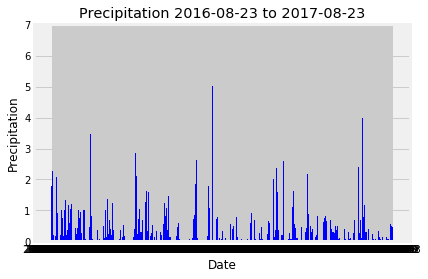

In [15]:
# Use Pandas Plotting with Matplotlib to plot the data
date=df['date']
prcp=df['precipitation']
plt.bar(date,prcp, color="b", align="center")
plt.title("Precipitation 2016-08-23 to 2017-08-23")
plt.xlabel("Date")
plt.ylabel("Precipitation")

plt.show()


In [16]:
prcp_dict = dict(zip( date, prcp))
prcp_dict

{'2016-08-23': 0.02,
 '2016-08-24': 2.15,
 '2016-08-25': 0.08,
 '2016-08-26': 0.0,
 '2016-08-27': nan,
 '2016-08-28': 2.07,
 '2016-08-29': 0.35,
 '2016-08-30': 0.0,
 '2016-08-31': 0.25,
 '2016-09-01': 0.0,
 '2016-09-02': 0.19,
 '2016-09-03': 0.07,
 '2016-09-04': 0.44,
 '2016-09-05': 0.18,
 '2016-09-06': 0.04,
 '2016-09-07': 0.23,
 '2016-09-08': 0.0,
 '2016-09-09': 0.16,
 '2016-09-10': 0.09,
 '2016-09-11': 0.6,
 '2016-09-12': 0.15,
 '2016-09-13': 0.37,
 '2016-09-14': nan,
 '2016-09-15': 0.83,
 '2016-09-16': 0.01,
 '2016-09-17': 0.05,
 '2016-09-18': 0.0,
 '2016-09-19': nan,
 '2016-09-20': 0.43,
 '2016-09-21': 0.0,
 '2016-09-22': 0.02,
 '2016-09-23': 0.0,
 '2016-09-24': 0.01,
 '2016-09-25': 0.04,
 '2016-09-26': nan,
 '2016-09-27': 0.02,
 '2016-09-28': 0.0,
 '2016-09-29': 0.18,
 '2016-09-30': 0.15,
 '2016-10-01': 1.02,
 '2016-10-02': 0.0,
 '2016-10-03': 0.0,
 '2016-10-04': 0.0,
 '2016-10-05': 0.0,
 '2016-10-06': 0.0,
 '2016-10-07': 0.0,
 '2016-10-08': 0.0,
 '2016-10-09': 0.0,
 '2016-10-10'

In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [18]:

# Design a query to show how many stations are available in this dataset?
num_stations=session.query(Measurement.station).distinct().count()
print(f"There are {num_stations} total stations.")


There are 9 total stations.


In [19]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
stations=session.query(Measurement.station)
unique=session.query(Measurement.station).distinct()

for u in unique:
    print(f"Station number {u.station} has {session.query(Measurement).filter_by(station=u.station).count()} entries.")


Station number USC00519397 has 2724 entries.
Station number USC00513117 has 2709 entries.
Station number USC00514830 has 2202 entries.
Station number USC00517948 has 1372 entries.
Station number USC00518838 has 511 entries.
Station number USC00519523 has 2669 entries.
Station number USC00519281 has 2772 entries.
Station number USC00511918 has 1979 entries.
Station number USC00516128 has 2612 entries.


In [20]:
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc())\
    .all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [21]:
station_ct=session.query(Measurement.station, Measurement.prcp).all()

In [22]:
station_df = pd.DataFrame(station_ct, columns=['station', 'precipitation'])
station_df.groupby('station').count()['precipitation'].sort_values(ascending=False)

station
USC00519281    2772
USC00513117    2696
USC00519397    2685
USC00519523    2572
USC00516128    2484
USC00514830    1937
USC00511918    1932
USC00517948     683
USC00518838     342
Name: precipitation, dtype: int64

In [23]:

# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

In [24]:

        
# active= session.query(Measurement.station, Measurement.tobs).filter_by(station='USC00519281')
# # for a in active:
# #     print(a.tobs)
# func.avg(Measurement.tobs).filter_by(station='USC00519281')

active= session.query(Measurement.station, Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').all()
active


[('USC00519281', 70.0),
 ('USC00519281', 62.0),
 ('USC00519281', 74.0),
 ('USC00519281', 75.0),
 ('USC00519281', 74.0),
 ('USC00519281', 76.0),
 ('USC00519281', 69.0),
 ('USC00519281', 66.0),
 ('USC00519281', 70.0),
 ('USC00519281', 75.0),
 ('USC00519281', 64.0),
 ('USC00519281', 60.0),
 ('USC00519281', 61.0),
 ('USC00519281', 68.0),
 ('USC00519281', 64.0),
 ('USC00519281', 66.0),
 ('USC00519281', 67.0),
 ('USC00519281', 70.0),
 ('USC00519281', 67.0),
 ('USC00519281', 67.0),
 ('USC00519281', 69.0),
 ('USC00519281', 60.0),
 ('USC00519281', 75.0),
 ('USC00519281', 75.0),
 ('USC00519281', 65.0),
 ('USC00519281', 75.0),
 ('USC00519281', 69.0),
 ('USC00519281', 67.0),
 ('USC00519281', 66.0),
 ('USC00519281', 69.0),
 ('USC00519281', 72.0),
 ('USC00519281', 67.0),
 ('USC00519281', 65.0),
 ('USC00519281', 64.0),
 ('USC00519281', 67.0),
 ('USC00519281', 67.0),
 ('USC00519281', 68.0),
 ('USC00519281', 69.0),
 ('USC00519281', 66.0),
 ('USC00519281', 69.0),
 ('USC00519281', 61.0),
 ('USC00519281',

In [25]:
sel = [func.min(Measurement.tobs),
       func.max(Measurement.tobs),
       func.avg(Measurement.tobs)]

top_stn_results = session.query(*sel).\
    filter(Measurement.station == 'USC00519281').all()
top_stn_results

[(54.0, 85.0, 71.66378066378067)]

In [26]:
# Choose the station with the highest number of temperature observations.

stations=session.query(Measurement.station, Measurement.tobs)
unique=(session.query(Measurement.station).distinct())

for u in unique:
    print("(", u.station, ",", session.query(Measurement.tobs).filter_by(station=u.station).count(), ")")

    


( USC00519397 , 2724 )
( USC00513117 , 2709 )
( USC00514830 , 2202 )
( USC00517948 , 1372 )
( USC00518838 , 511 )
( USC00519523 , 2669 )
( USC00519281 , 2772 )
( USC00511918 , 1979 )
( USC00516128 , 2612 )


In [27]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
sel = [Measurement.date,
       Measurement.tobs]

top_stn_temps = session.query(*sel).\
    filter(Measurement.station == 'USC00519281').\
    filter(and_(Measurement.date >= '2016-08-23', Measurement.date <= '2017-08-23')).all()
top_stn_temps

[('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-

In [28]:

df = pd.DataFrame(top_stn_temps, columns=['date', 'temp'])
# df.set_index(df['date'], drop=True, inplace=True)
# df=df.drop(columns="date")
df.tail()
# df.dtypes

,date,temp
347,2017-08-14,77.0
348,2017-08-15,77.0
349,2017-08-16,76.0
350,2017-08-17,76.0
351,2017-08-18,79.0


[[<matplotlib.axes._subplots.AxesSubplot object at 0x00000174A97DBB38>]]


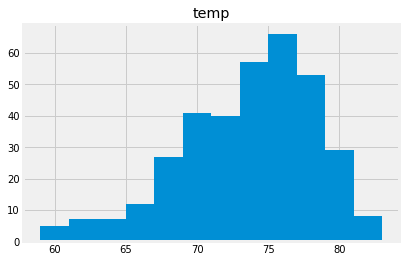

In [29]:
hist = df.hist(bins=12)

print(hist)

![precipitation](Images/station-histogram.png)

In [30]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05')[0])

(62.0, 69.57142857142857, 74.0)


In [41]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

start_date='2016-08-23'
end_date='2017-08-23'

print(calc_temps(start_date, end_date))
trip=calc_temps(start_date, end_date)
trip


session.query(func.avg(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()


[(58.0, 74.59058295964125, 87.0)]


[(74.59058295964125)]

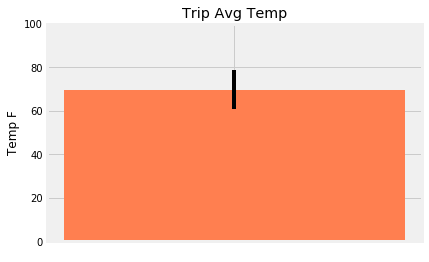

In [42]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)




yerr= (74.0-65.0)
y_val=69.66666666666667
x_val= " "
plt.bar(x_val, y_val, yerr=yerr, color="coral", width=0.25, align="center")
plt.title("Trip Avg Temp")
plt.ylim(0, 100)

plt.ylabel("Temp F")
plt.show()

In [43]:
inspector = inspect(engine)
columns = inspector.get_columns('station')
columns

first_row_s = session.query(Station).first()
first_row_s.__dict__

first_row_m = session.query(Measurement).first()
first_row_m.__dict__


{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x174a719ea58>,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1}

In [44]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

#NEEDS SUM FUNCTION ON RAINFALL

sel = [Measurement.station, Station.name, Measurement.prcp, Station.latitude, Station.longitude, Station.elevation ]
join_station = session.query(*sel).\
            filter(Measurement.station == Station.station).\
            filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).\
            order_by(Measurement.prcp.desc()).\
            limit(10).distinct('station').all()

for record in join_station:
    print("[",record.station,",", record.name,",", record.prcp,",", 
          record.latitude,",", record.longitude,",", record.elevation,"]" )

[ USC00516128 , MANOA LYON ARBO 785.2, HI US , 6.7 , 21.3331 , -157.8025 , 152.4 ]
[ USC00519523 , WAIMANALO EXPERIMENTAL FARM, HI US , 6.25 , 21.33556 , -157.71139 , 19.5 ]
[ USC00519523 , WAIMANALO EXPERIMENTAL FARM, HI US , 5.04 , 21.33556 , -157.71139 , 19.5 ]
[ USC00516128 , MANOA LYON ARBO 785.2, HI US , 4.0 , 21.3331 , -157.8025 , 152.4 ]
[ USC00516128 , MANOA LYON ARBO 785.2, HI US , 3.46 , 21.3331 , -157.8025 , 152.4 ]
[ USC00516128 , MANOA LYON ARBO 785.2, HI US , 3.35 , 21.3331 , -157.8025 , 152.4 ]
[ USC00519281 , WAIHEE 837.5, HI US , 2.98 , 21.45167 , -157.84888999999998 , 32.9 ]
[ USC00513117 , KANEOHE 838.1, HI US , 2.9 , 21.4234 , -157.8015 , 14.6 ]
[ USC00516128 , MANOA LYON ARBO 785.2, HI US , 2.87 , 21.3331 , -157.8025 , 152.4 ]
[ USC00516128 , MANOA LYON ARBO 785.2, HI US , 2.82 , 21.3331 , -157.8025 , 152.4 ]


## Optional Challenge Assignment

In [45]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [46]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [37]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [38]:
# Plot the daily normals as an area plot with `stacked=False`
